In [18]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np

car = pd.read_csv("data/car_sensor_data.csv", header=0, encoding='utf-8')

#对时间列做个处理
car.index = [pd.datetime.strptime(row[:-5], '%Y/%m/%d %H:%M:%S') for row in car[u"时间"]]

#获取时间段 [2016-04-12 07:09:20, 2016-05-06 10:45:52]
print car.index

DatetimeIndex(['2016-04-12 07:09:20', '2016-04-12 07:09:30',
               '2016-04-12 07:09:40', '2016-04-12 07:09:50',
               '2016-04-12 07:10:00', '2016-04-12 07:10:03',
               '2016-04-12 07:10:10', '2016-04-12 07:10:20',
               '2016-04-12 07:10:30', '2016-04-12 07:10:40',
               ...
               '2016-05-06 10:44:22', '2016-05-06 10:44:32',
               '2016-05-06 10:44:42', '2016-05-06 10:44:52',
               '2016-05-06 10:45:02', '2016-05-06 10:45:12',
               '2016-05-06 10:45:22', '2016-05-06 10:45:32',
               '2016-05-06 10:45:42', '2016-05-06 10:45:52'],
              dtype='datetime64[ns]', length=100000, freq=None)


In [19]:
#获取恒定的参数(方差为0)--个数：31
var_count = 0
for column in car.columns[1:]:
    if np.var(car[column]) == 0.0:
        print u"恒定参数的名称：%s" % column
        var_count += 1
print u"恒定参数的总数：%s"  % str(var_count)

恒定参数的名称：制冷模式指令
恒定参数的名称：除霜模式指令
恒定参数的名称：制热模式指令
恒定参数的名称：交流充电模式指令
恒定参数的名称：动力电池加热模式指令
恒定参数的名称：远程开关状态
恒定参数的名称：远程唤醒信号
恒定参数的名称：高压系统检测状态超时
恒定参数的名称：VCU故障处理等级
恒定参数的名称：驻车指令
恒定参数的名称：高压上电指令
恒定参数的名称：电子驻车制动系统当前状态
恒定参数的名称：电子驻车制动系统初始化状态
恒定参数的名称：动力电池可用能量
恒定参数的名称：动力电池当前状态
恒定参数的名称：动力加热状态
恒定参数的名称：动力电池保温状态
恒定参数的名称：紧急开关状态
恒定参数的名称：冷却风扇当前状态
恒定参数的名称：EPS助力电机当前转矩
恒定参数的名称：电池92#单体电压
恒定参数的名称：电池93#单体电压
恒定参数的名称：电池94#单体电压
恒定参数的名称：电池95#单体电压
恒定参数的名称：电池96#单体电压
恒定参数的名称：电池97#单体电压
恒定参数的名称：电池98#单体电压
恒定参数的名称：电池99#单体电压
恒定参数的名称：电池100#单体电压
恒定参数的名称：高低压互锁电压
恒定参数的名称：PTC零部件号后四位
恒定参数的总数：31


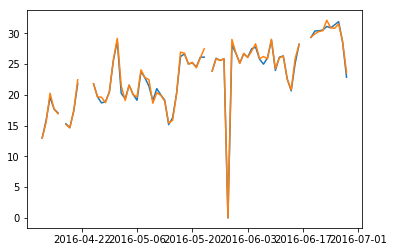

In [20]:
#获取温度检测点1号和2号的天平均值
temperature1 = car[[u"温度检测点1号温度"]]
temperature1 = temperature1.resample('D').mean()
#print temperature1

temperature2 = car[[u"温度检测点2号温度"]]
temperature2 = temperature2.resample('D').mean()
#print temperature2

import matplotlib.pyplot as plt
plt.figure()
plt.plot(temperature1)
plt.plot(temperature2)
plt.show()

温度检测点1号温度序列：存在空缺值的时间：
DatetimeIndex(['2016-04-17', '2016-04-22', '2016-04-24', '2016-05-24',
               '2016-06-17', '2016-06-18'],
              dtype='datetime64[ns]', freq=None)
温度检测点2号温度序列：存在空缺值的时间：
DatetimeIndex(['2016-04-17', '2016-04-22', '2016-04-24', '2016-05-24',
               '2016-06-17', '2016-06-18'],
              dtype='datetime64[ns]', freq=None)


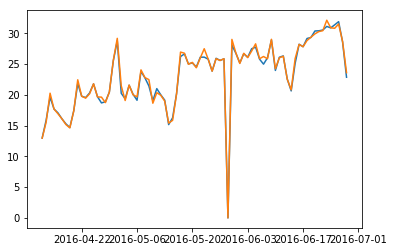

In [21]:
#找空缺值
nanIndex1 = temperature1.index[np.where(np.isnan(temperature1))[0]]
nanIndex2 = temperature2.index[np.where(np.isnan(temperature2))[0]]

print u"温度检测点1号温度序列：存在空缺值的时间：" 
print nanIndex1
print u"温度检测点2号温度序列：存在空缺值的时间：" 
print nanIndex2

#填充空缺值
#根据空缺值的index，扩充前后2个index
def getMoreIndex(index):
    import dateutil
    indexs = []
    indexs.append(index+dateutil.relativedelta.relativedelta(days=1))
    indexs.append(index+dateutil.relativedelta.relativedelta(days=2))
    indexs.append(index-dateutil.relativedelta.relativedelta(days=1))
    indexs.append(index-dateutil.relativedelta.relativedelta(days=2))
    return pd.to_datetime(indexs)

#使用周围几个点的均值来填充
for index1 in nanIndex1:
    temperature1[u"温度检测点1号温度"][index1] = (temperature2[u"温度检测点2号温度"][getMoreIndex(index1)]).mean()

for index2 in nanIndex2:
    temperature2[u"温度检测点2号温度"][index2] = (temperature2[u"温度检测点2号温度"][getMoreIndex(index2)]).mean()

plt.figure()
plt.plot(temperature1)
plt.plot(temperature2)
plt.show()

In [23]:
#查找异常值---计算均值和标准差
mn = temperature1[u"温度检测点1号温度"].mean()
sd = temperature1[u"温度检测点1号温度"].std()
min = mn - 3*sd
max = mn + 3*sd
print "可能存在异常情况的时间："
print temperature1[temperature1[u"温度检测点1号温度"] < min]
print temperature1[temperature1[u"温度检测点1号温度"] > max]

可能存在异常情况的时间：
            温度检测点1号温度
2016-05-29        0.0
Empty DataFrame
Columns: [温度检测点1号温度]
Index: []
